##NID-2019 Train Dataset

In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# from imblearn.over_sampling import SMOTE


In [19]:
df = pd.read_csv("nid-train.csv")

In [20]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [21]:
df.shape

(25192, 42)

In [22]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [23]:
df.dropna(inplace=True)
print("New dataset size:",len(df))

New dataset size: 25192


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [25]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
categoric_var = df.select_dtypes(include=['object']).columns
categoric_var

Index(['protocol_type', 'service', 'flag', 'class'], dtype='object')

In [27]:
df_e = df.copy(deep=True)

le = LabelEncoder()
for col in categoric_var:
        df_e[col] = le.fit_transform(df[col])
        le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print('Feature', col)
        print('mapping', le_name_mapping)

Feature protocol_type
mapping {'icmp': 0, 'tcp': 1, 'udp': 2}
Feature service
mapping {'IRC': 0, 'X11': 1, 'Z39_50': 2, 'auth': 3, 'bgp': 4, 'courier': 5, 'csnet_ns': 6, 'ctf': 7, 'daytime': 8, 'discard': 9, 'domain': 10, 'domain_u': 11, 'echo': 12, 'eco_i': 13, 'ecr_i': 14, 'efs': 15, 'exec': 16, 'finger': 17, 'ftp': 18, 'ftp_data': 19, 'gopher': 20, 'hostnames': 21, 'http': 22, 'http_443': 23, 'http_8001': 24, 'imap4': 25, 'iso_tsap': 26, 'klogin': 27, 'kshell': 28, 'ldap': 29, 'link': 30, 'login': 31, 'mtp': 32, 'name': 33, 'netbios_dgm': 34, 'netbios_ns': 35, 'netbios_ssn': 36, 'netstat': 37, 'nnsp': 38, 'nntp': 39, 'ntp_u': 40, 'other': 41, 'pm_dump': 42, 'pop_2': 43, 'pop_3': 44, 'printer': 45, 'private': 46, 'red_i': 47, 'remote_job': 48, 'rje': 49, 'shell': 50, 'smtp': 51, 'sql_net': 52, 'ssh': 53, 'sunrpc': 54, 'supdup': 55, 'systat': 56, 'telnet': 57, 'tim_i': 58, 'time': 59, 'urh_i': 60, 'urp_i': 61, 'uucp': 62, 'uucp_path': 63, 'vmnet': 64, 'whois': 65}
Feature flag
mapping

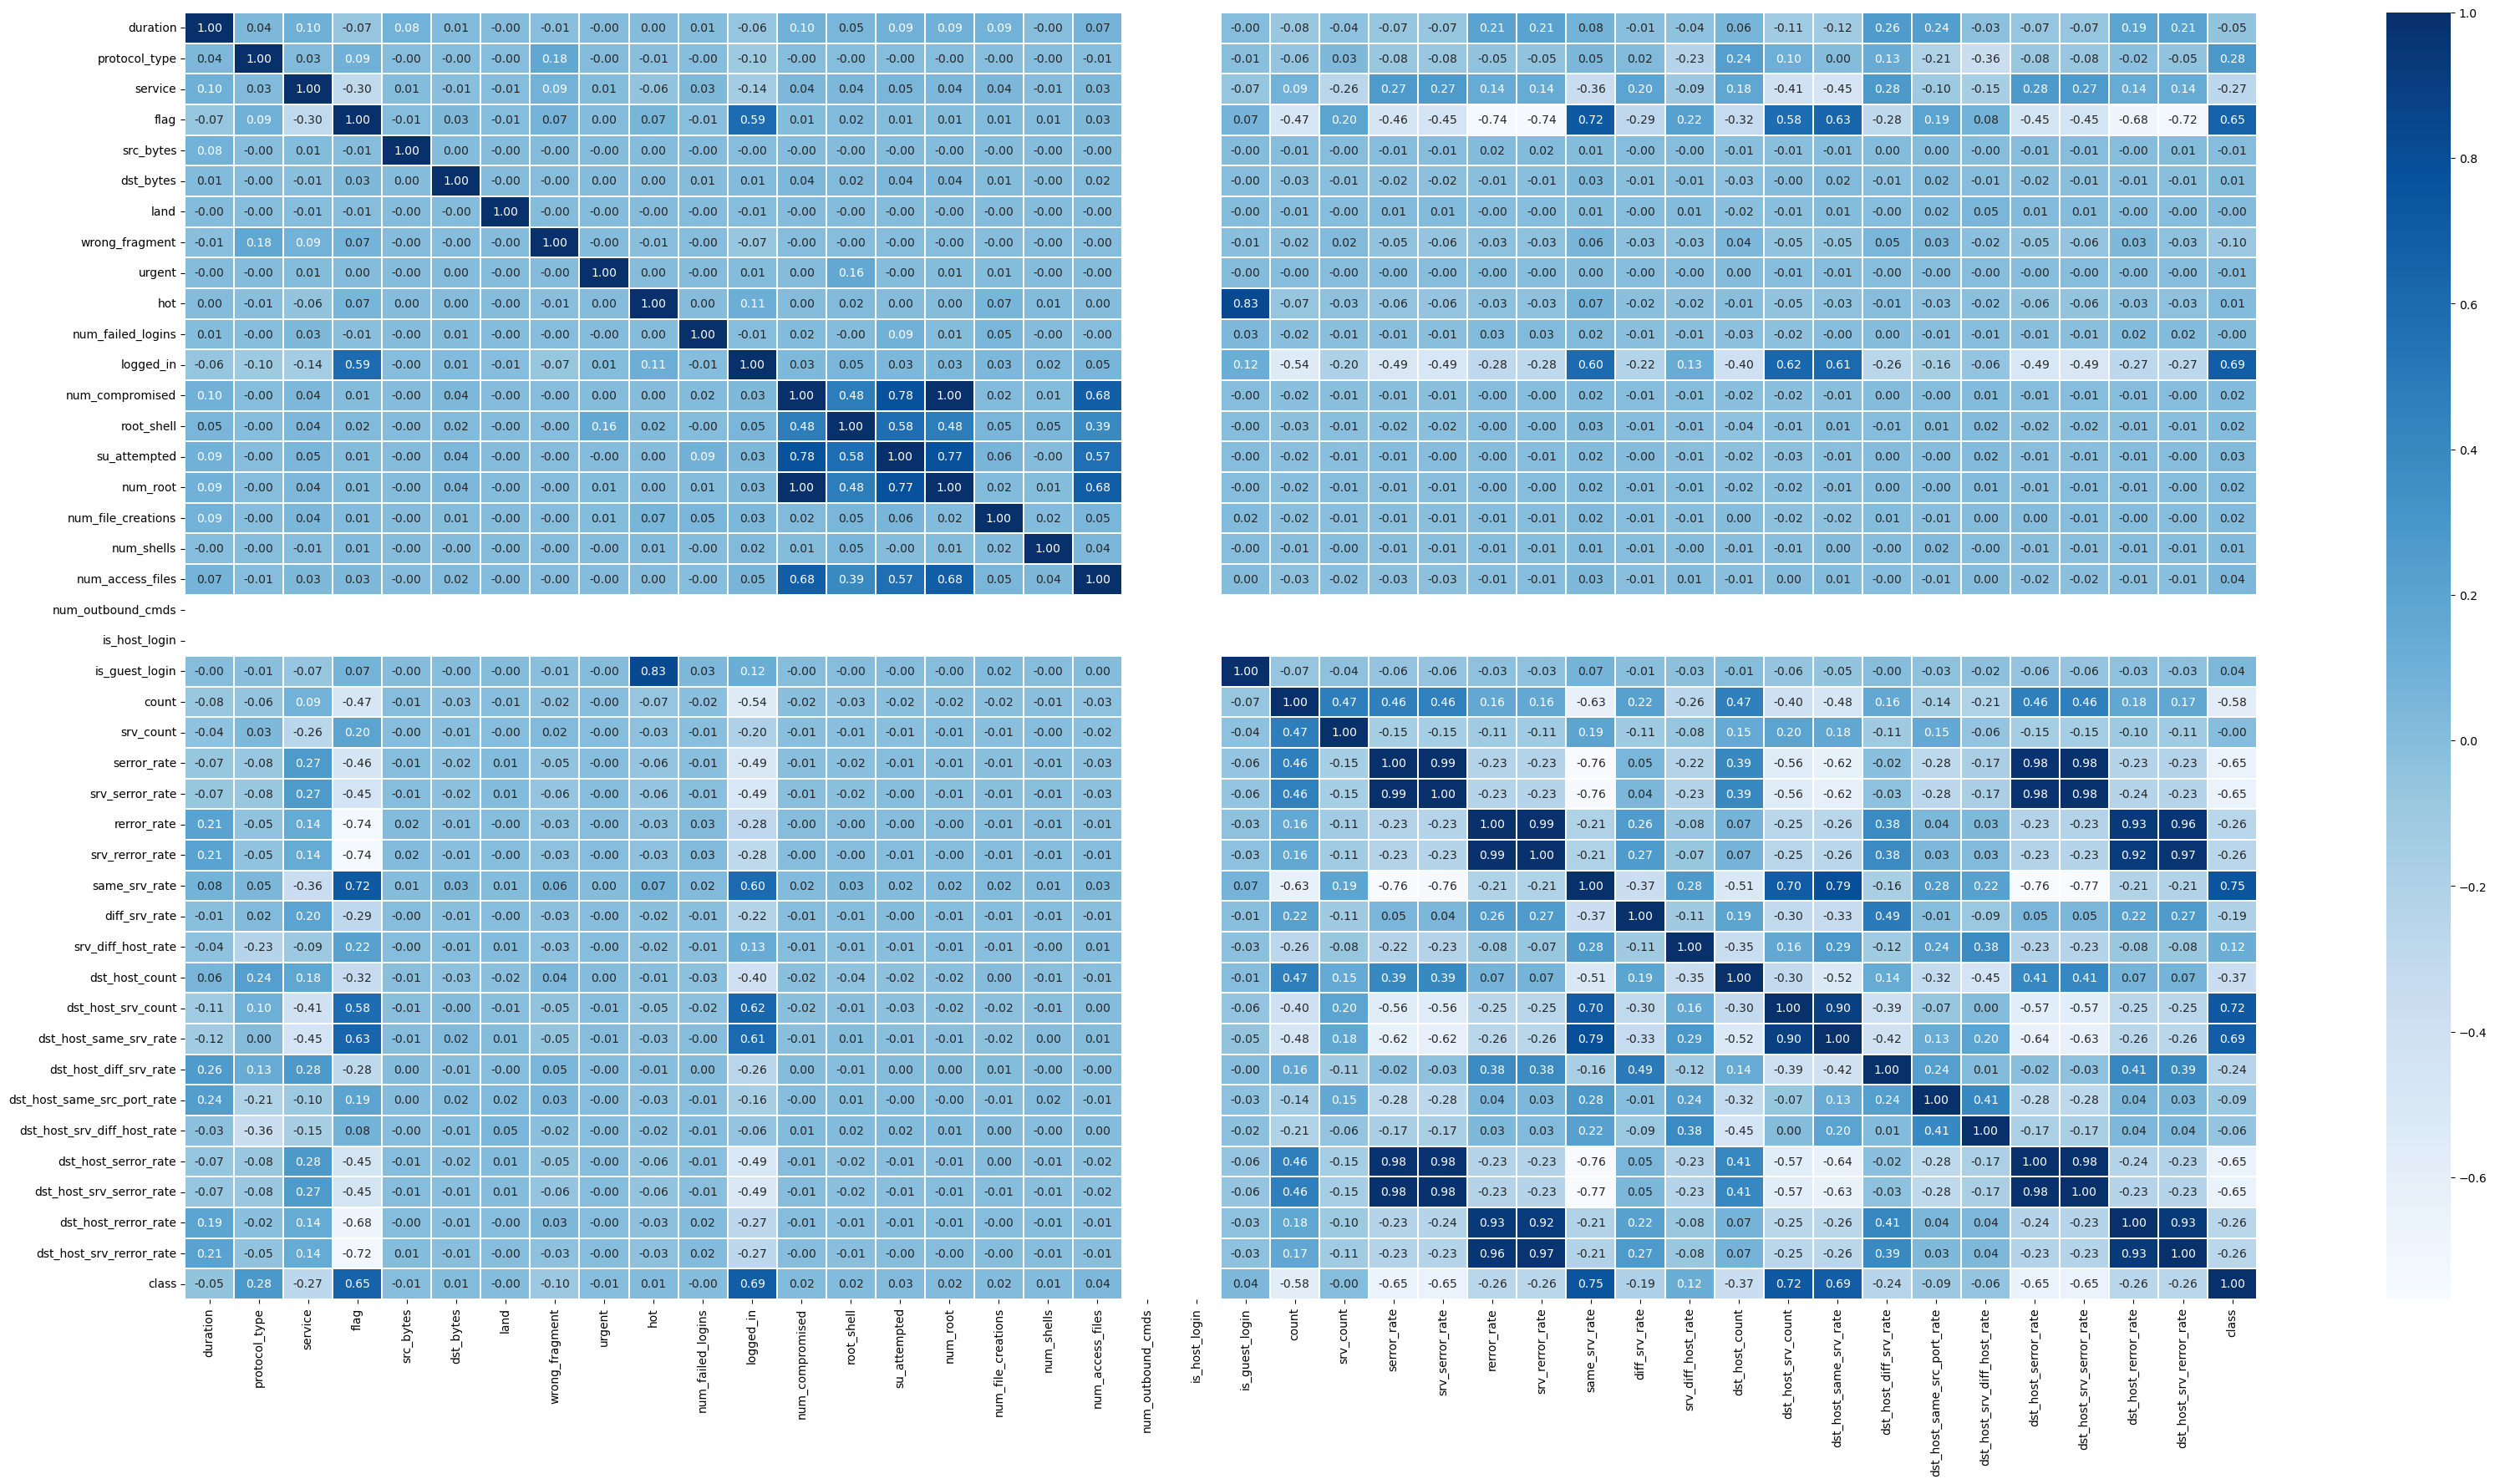

In [28]:
corr_matrix = df_e.corr()
plt.rcParams["figure.figsize"] = [40,20]
sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns,yticklabels=corr_matrix.columns,linewidths=.1,cmap="Blues", annot=True, fmt='.2f')
plt.show()

In [29]:
#This matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

solution = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

#The first element of 'solution' series is the pair with the biggest correlation.
solution

num_compromised       num_root                    0.998956
serror_rate           srv_serror_rate             0.993290
rerror_rate           srv_rerror_rate             0.989134
dst_host_serror_rate  dst_host_srv_serror_rate    0.984706
srv_serror_rate       dst_host_srv_serror_rate    0.984621
                                                    ...   
flag                  srv_rerror_rate            -0.736946
srv_serror_rate       same_srv_rate              -0.759104
same_srv_rate         dst_host_serror_rate       -0.763522
serror_rate           same_srv_rate              -0.764557
same_srv_rate         dst_host_srv_serror_rate   -0.767487
Length: 780, dtype: float64

In [30]:
df_corr = pd.DataFrame(solution).reset_index()
df_corr.rename(columns = {'level_0':'Var1', 'level_1':'Var2', 0:'Corr'}, inplace = True)
df_corr.query("Var1 == 'class' or Var2 == 'class'")

,Var1,Var2,Corr
18,same_srv_rate,class,0.749237
20,dst_host_srv_count,class,0.719292
22,dst_host_same_srv_rate,class,0.692212
23,logged_in,class,0.688084
26,flag,class,0.651309
56,protocol_type,class,0.283653
107,srv_diff_host_rate,class,0.120649
157,is_guest_login,class,0.038662
160,num_access_files,class,0.036999
188,su_attempted,class,0.025851


In [31]:
df_high_corr = df_corr.query("Corr>=0.5 or Corr<=-0.5")
df_high_corr

,Var1,Var2,Corr
0,num_compromised,num_root,0.998956
1,serror_rate,srv_serror_rate,0.993290
2,rerror_rate,srv_rerror_rate,0.989134
3,dst_host_serror_rate,dst_host_srv_serror_rate,0.984706
4,srv_serror_rate,dst_host_srv_serror_rate,0.984621
5,serror_rate,dst_host_srv_serror_rate,0.979602
6,serror_rate,dst_host_serror_rate,0.978022
7,srv_serror_rate,dst_host_serror_rate,0.976363
8,srv_rerror_rate,dst_host_srv_rerror_rate,0.969841
9,rerror_rate,dst_host_srv_rerror_rate,0.964886


##NID Test Dataset

In [32]:
df_t = pd.read_csv("nid-test.csv")
df_t.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [33]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [34]:
categoric_var_t = df_t.select_dtypes(include=['object']).columns
categoric_var_t

Index(['protocol_type', 'service', 'flag'], dtype='object')

In [37]:
df_te = df.copy(deep=True)

le = LabelEncoder()
for col in categoric_var_t:
        df_te[col] = le.fit_transform(df_t[col])
        le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print('Feature', col)
        print('mapping', le_name_mapping)

ValueError: Length of values (22544) does not match length of index (25192)

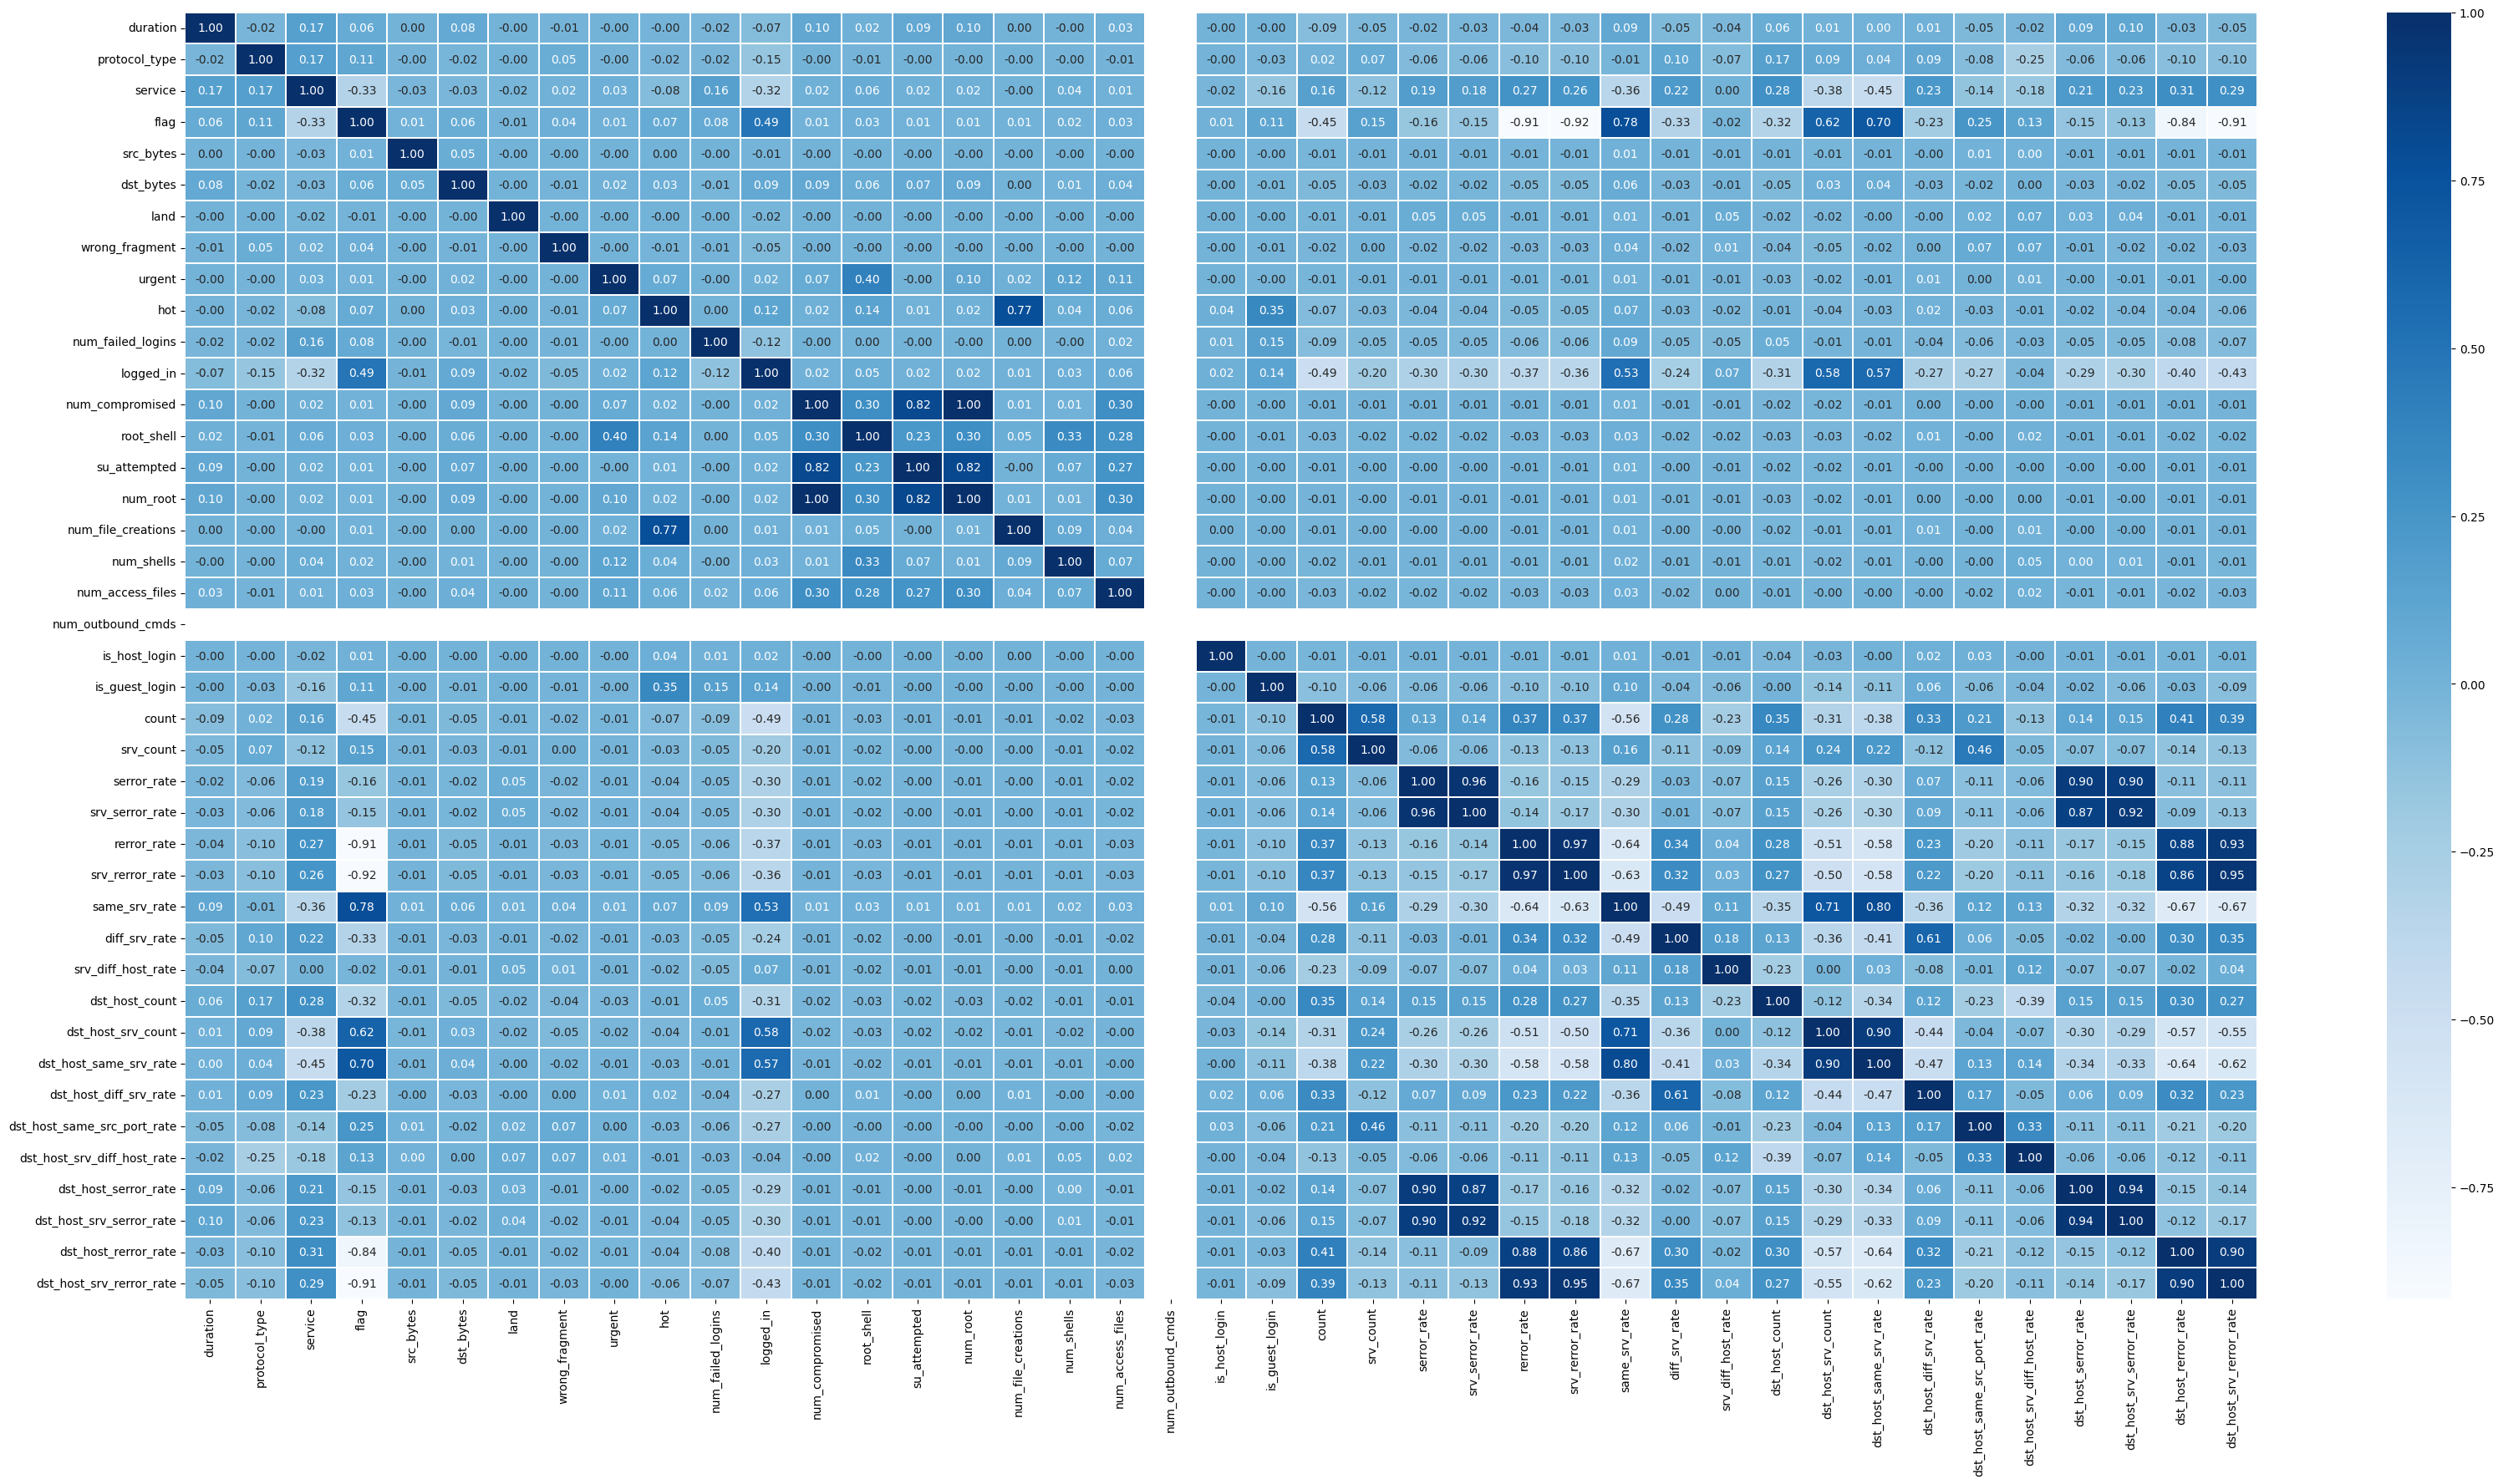

In [ ]:
corr_matrix_t = df_te.corr()
plt.rcParams["figure.figsize"] = [40,20]
sns.heatmap(corr_matrix_t,xticklabels=corr_matrix_t.columns,yticklabels=corr_matrix_t.columns,linewidths=.1,cmap="Blues", annot=True, fmt='.2f')
plt.show()